In [2]:
! pip install scanpy
! pip install anndata
! pip install scrublet
! pip install scipy
! pip install pandas
! pip install seaborn
! pip install numpy
! pip install adjustText
! pip install celltypist
! pip install scvelo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-linux_x86_64.whl size=553318 sha256=4d4145c3f1f75cef3370f1461ba38dec39c6792612536f130c4f151fd605dabf
  Stored in directory: /root/.cache/pip/wheels/33/e5/58/0a3e34b92bedf09b4c57e37a63ff395ade6f6c1099ba59877c
Successfully built annoy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━

In [3]:
import os
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
import scrublet as scr
import scipy.sparse
import pandas as pd
import seaborn as sns
import numpy as np
from adjustText import adjust_text
import celltypist
from celltypist import models
import re
import scvelo as scv

In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
! ls

Mounted at /content/drive
drive  sample_data


In [5]:
# Set global parameters for consistency
RESOLUTION = 0.5
N_PCS = 50
N_NEIGHBORS = 10
MIN_GENES = 200
MIN_CELLS = 3
TARGET_SUM = 1e4

In [12]:
# RNAvelocity analysis from loom files


working_dir = "/content/drive/Shared with me/CarlySullivan/iteration2_all_with_cellranger/RNAvelocity")


# Change working directory
working_dir = "/content/drive/MyDrive/jj/projects/2025/CarlySullivan/iteration2_all_with_cellranger/RNAvelocity"
os.chdir(working_dir)

# Verify the current working directory
print("Current working directory:", os.getcwd())


# Define paths to your loom files

loom_files = {
    "11_5_WT": "11_5_WT_velocyto/11_5_WT_counts.loom",
    "10_5_WT": "10_5_WT_velocyto/10_5_WT_counts.loom",
    "11_5_cKO": "11_5_cKO_velocyto/11_5_cKO_counts.loom",
    "10_5_cKO": "10_5_cKO_velocyto/10_5_cKO_counts.loom",
}

# Load the loom files into a dictionary of AnnData objects
adata_dict = {key: sc.read(file, cache=True) for key, file in loom_files.items()}

# Print dataset info
for key, adata in adata_dict.items():
    print(f"{key}: {adata.shape}")  # Number of cells and genes

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CarlySullivan/iteration2_all_with_cellranger/RNAvelocity'

In [ ]:
# Preprocess data
for key, adata in adata_dict.items():
    # Check the structure of the loom file
    print(f"\n{key} keys:", adata.layers.keys())

    # scVelo expects 'spliced' and 'unspliced' layers
    scv.utils.show_proportions(adata)

for key, adata in adata_dict.items():
    # Basic filtering
    sc.pp.filter_genes(adata, min_counts=20)

    # Normalize and log-transform
    scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

    # Compute moments
    scv.pp.moments(adata, n_pcs=30, n_neighbors=30)


11_5_WT keys: KeysView(Layers with keys: ambiguous, matrix, spliced, unspliced)
Abundance of ['unspliced', 'spliced', 'ambiguous']: [0.18 0.77 0.05]

10_5_WT keys: KeysView(Layers with keys: ambiguous, matrix, spliced, unspliced)
Abundance of ['unspliced', 'spliced', 'ambiguous']: [0.12 0.84 0.04]

11_5_cKO keys: KeysView(Layers with keys: ambiguous, matrix, spliced, unspliced)
Abundance of ['unspliced', 'spliced', 'ambiguous']: [0.17 0.78 0.05]

10_5_cKO keys: KeysView(Layers with keys: ambiguous, matrix, spliced, unspliced)
Abundance of ['unspliced', 'spliced', 'ambiguous']: [0.11 0.85 0.04]
Filtered out 5074 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
<ipython-input-7-4f185b9d026d>:17: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  

computing neighbors
    finished (0:00:29) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 6349 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
<ipython-input-7-4f185b9d026d>:17: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 5539 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
<ipython-input-7-4f185b9d026d>:17: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 5341 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
<ipython-input-7-4f185b9d026d>:17: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
# Compute RNA velocity

for key, adata in adata_dict.items():
    scv.tl.velocity(adata, mode="stochastic")  # Alternative: mode="dynamical" (requires more computation)
    scv.tl.velocity_graph(adata)

computing velocities


/usr/local/lib/python3.11/dist-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/2 cores)


  0%|          | 0/4264 [00:00<?, ?cells/s]

    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities


/usr/local/lib/python3.11/dist-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/2 cores)


  0%|          | 0/4785 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities


/usr/local/lib/python3.11/dist-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/2 cores)


  0%|          | 0/5540 [00:00<?, ?cells/s]

    finished (0:00:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities


/usr/local/lib/python3.11/dist-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/2 cores)


  0%|          | 0/4254 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
# Perform preprocessing
# Compute Nearest Neighbors and UMAP

for key, adata in adata_dict.items():
    print(f"Computing neighbors and UMAP for {key}...")
    sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)  # Compute nearest neighbors
    sc.tl.umap(adata)  # Compute UMAP

    # Verify UMAP is created
    print(f"After UMAP computation, {key} embeddings:", adata.obsm.keys())

Computing neighbors and UMAP for 11_5_WT...
After UMAP computation, 11_5_WT embeddings: KeysView(AxisArrays with keys: X_pca, X_umap)
Computing neighbors and UMAP for 10_5_WT...
After UMAP computation, 10_5_WT embeddings: KeysView(AxisArrays with keys: X_pca, X_umap)
Computing neighbors and UMAP for 11_5_cKO...
After UMAP computation, 11_5_cKO embeddings: KeysView(AxisArrays with keys: X_pca, X_umap)
Computing neighbors and UMAP for 10_5_cKO...
After UMAP computation, 10_5_cKO embeddings: KeysView(AxisArrays with keys: X_pca, X_umap)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


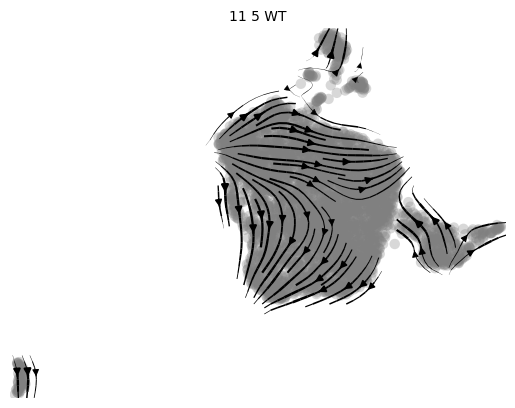

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


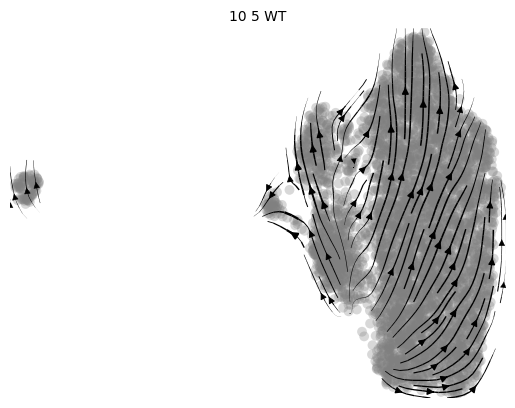

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


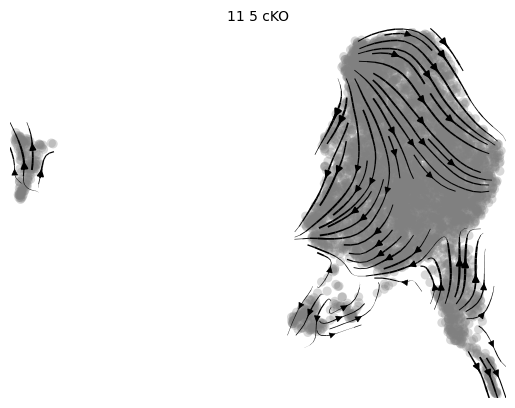

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


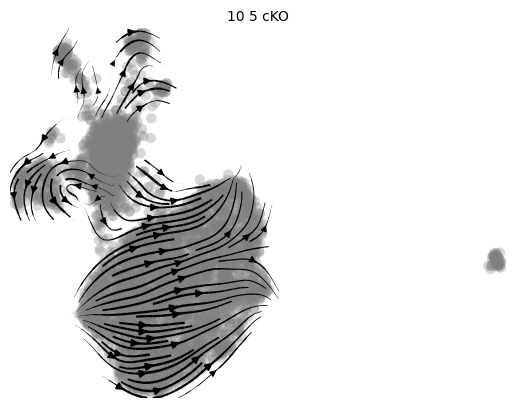

In [ ]:
# Deploy RNA velocity plots
# UMAP Embedding with Velocity
for key, adata in adata_dict.items():
    scv.pl.velocity_embedding_stream(adata, basis="umap", title=key)

In [ ]:
# Compute Leiden clustering
for key, adata in adata_dict.items():
    print(f"Computing Leiden clustering for {key}...")

    # Compute neighbors if not done
    if 'distances' not in adata.obsp:
        sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)

    # Perform Leiden clustering
    sc.tl.leiden(adata, resolution=0.5)  # Adjust resolution as needed

    # Verify clusters
    print(f"Leiden clusters for {key}:", adata.obs['leiden'].value_counts())

Computing Leiden clustering for 11_5_WT...
Leiden clusters for 11_5_WT: leiden
0    1493
1     891
2     711
3     599
4     317
5     108
6      83
7      62
Name: count, dtype: int64
Computing Leiden clustering for 10_5_WT...
Leiden clusters for 10_5_WT: leiden
0    1731
1    1165
2     955
3     538
4     277
5      78
6      41
Name: count, dtype: int64
Computing Leiden clustering for 11_5_cKO...
Leiden clusters for 11_5_cKO: leiden
0    1475
1    1196
2    1068
3    1063
4     420
5     169
6     149
Name: count, dtype: int64
Computing Leiden clustering for 10_5_cKO...
Leiden clusters for 10_5_cKO: leiden
0    974
1    863
2    785
3    772
4    428
5    190
6    118
7     80
8     44
Name: count, dtype: int64


In [ ]:
# Conduct markers identification for Leiden clusters
import scanpy as sc
import pandas as pd

# Perform differential expression analysis for each dataset
for key, adata in adata_dict.items():
    print(f"Performing differential expression analysis for {key}...")

    # Run differential expression analysis
    sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', key_added='rank_genes')

    # Check if rank_genes_groups results exist
    if 'rank_genes' not in adata.uns or 'names' not in adata.uns['rank_genes']:
        print(f"Warning: No differential expression results found for {key}. Skipping...")
        continue

    # Extract marker genes
    markers_dict = adata.uns['rank_genes']

    # Get actual number of clusters
    cluster_ids = sorted(adata.obs['leiden'].unique().astype(str))  # Ensure sorted cluster order
    n_clusters = len(cluster_ids)
    print(f"Found {n_clusters} clusters for {key}")

    marker_genes = []

    for i, cluster_id in enumerate(cluster_ids):
        cluster_name = str(cluster_id)

        try:
            genes = markers_dict['names'][cluster_id].tolist()  # Convert structured array entry to list
            logfoldchanges = markers_dict['logfoldchanges'][cluster_id].tolist()
            pvals = markers_dict['pvals'][cluster_id].tolist()
            pvals_adj = markers_dict['pvals_adj'][cluster_id].tolist()
        except KeyError:
            print(f"Warning: No genes found for cluster {cluster_name} in {key}")
            continue  # Skip empty clusters

        if not genes:
            print(f"Warning: Cluster {cluster_name} has no significant marker genes.")
            continue

        print(f"Cluster {cluster_name} top genes: {genes[:5]}")  # Print first 5 genes

        for gene_idx, gene in enumerate(genes):
            marker_genes.append({
                'cluster': cluster_name,
                'gene': gene,
                'logfoldchange': logfoldchanges[gene_idx],
                'pvals': pvals[gene_idx],
                'pvals_adj': pvals_adj[gene_idx]
            })

    # Save results
    if marker_genes:
        markers_df = pd.DataFrame(marker_genes)
        filename = f"{key}_leiden_markers.csv"
        markers_df.to_csv(filename, index=False)
        print(f"Marker genes for {key} saved to {filename}")
    else:
        print(f"No marker genes identified for {key}. Skipping CSV export.")

Performing differential expression analysis for 11_5_WT...
Found 8 clusters for 11_5_WT
Cluster 0 top genes: ['Ptn', 'Col3a1', 'Hmga2', 'Meis2', 'Pkdcc']
Cluster 1 top genes: ['Ptma', 'Hoxa11os', 'Mif', 'Npm1', 'Hoxd13']
Cluster 2 top genes: ['Top2a', 'Hmgb2', 'Cenpf', 'Arl6ip1', 'Birc5']
Cluster 3 top genes: ['Sox9', 'Col2a1', 'Cdkn1c', 'Malat1', 'Ldhb']
Cluster 4 top genes: ['Ppp1r14b', 'Tpm2', 'Pdgfa', 'Tnnt1', 'Itm2a']
Cluster 5 top genes: ['S100a11', 'Wnt6', 'Pdgfa', 'Epcam', 'Cxcl14']
Cluster 6 top genes: ['Tagln2', 'Cd34', 'Egfl7', 'Cotl1', 'Tmsb4x']
Cluster 7 top genes: ['Hbb-bh1', 'Hba-x', 'Hbb-y', 'Hba-a1', 'Hba-a2']
Marker genes for 11_5_WT saved to 11_5_WT_leiden_markers.csv
Performing differential expression analysis for 10_5_WT...
Found 7 clusters for 10_5_WT
Cluster 0 top genes: ['Hoxd11', 'Nnat', 'Hoxa10', 'Hoxa11os', 'Sub1']
Cluster 1 top genes: ['Ptn', 'Cdkn1c', 'Mdk', 'H2afv', 'Gpc3']
Cluster 2 top genes: ['Pkdcc', 'Ptn', 'Arl6ip1', 'Crabp2', 'Meis2']
Cluster 3 top g

In [ ]:
# Check that the number of Leiden clusters is the same as the one reported in the csv files

import glob

# Get all Leiden marker CSV files
csv_files = glob.glob("*_leiden_markers.csv")

for file in csv_files:
    df = pd.read_csv(file)
    unique_clusters = df['cluster'].nunique()  # Count unique clusters
    print(f"{file}: {unique_clusters} clusters in CSV")


11_5_WT_leiden_markers.csv: 8 clusters in CSV
10_5_WT_leiden_markers.csv: 7 clusters in CSV
11_5_cKO_leiden_markers.csv: 7 clusters in CSV
10_5_cKO_leiden_markers.csv: 9 clusters in CSV


11_5_WT: 8 clusters in plot


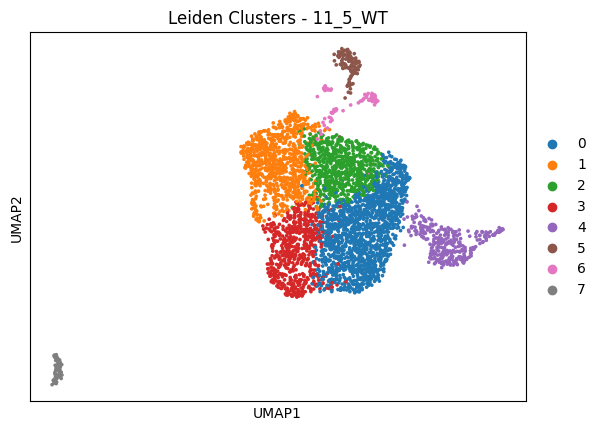

10_5_WT: 7 clusters in plot


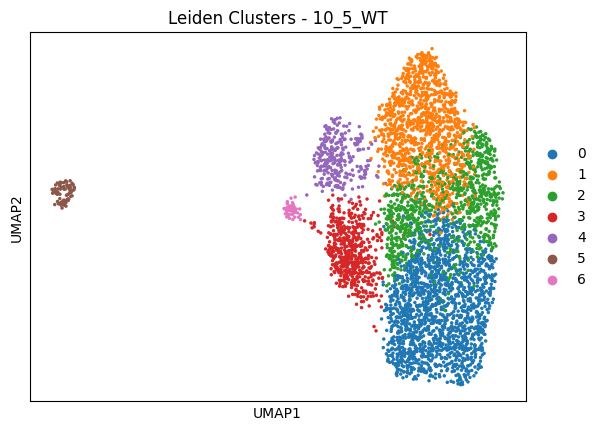

11_5_cKO: 7 clusters in plot


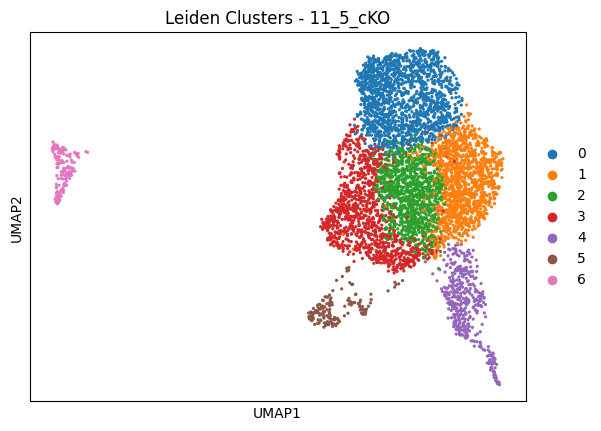

10_5_cKO: 9 clusters in plot


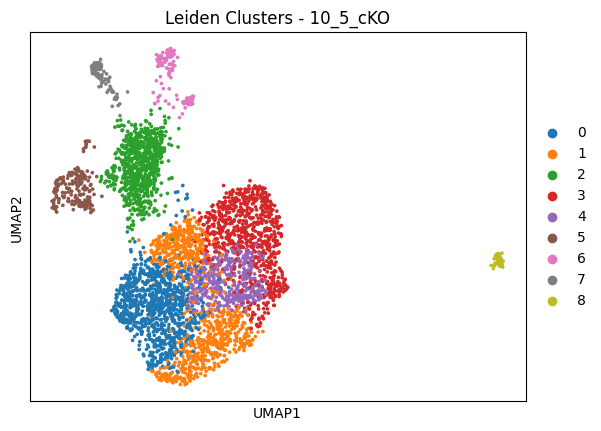

In [ ]:
# Plot Leiden clusters for each dataset
for key, adata in adata_dict.items():
    print(f"{key}: {adata.obs['leiden'].nunique()} clusters in plot")

    sc.pl.umap(adata, color="leiden", title=f"Leiden Clusters - {key}")
    plt.show()

Plotting RNA velocity for 11_5_WT with Leiden clusters...


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

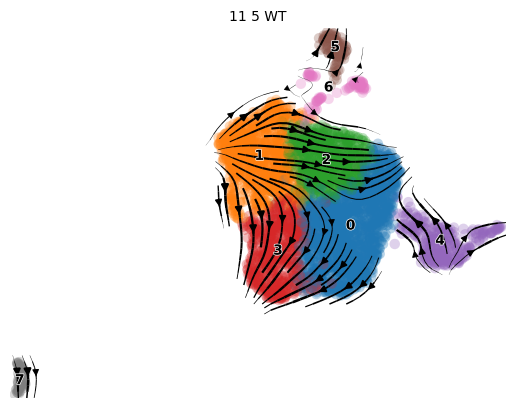

Plotting RNA velocity for 10_5_WT with Leiden clusters...


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

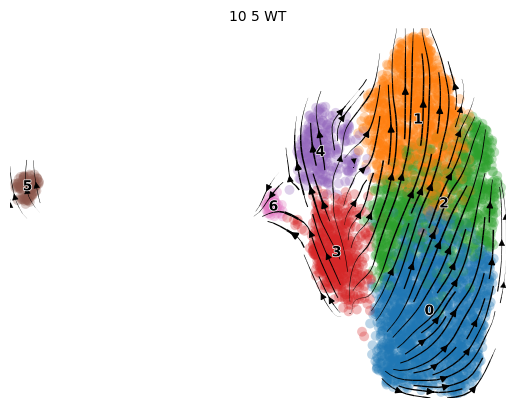

Plotting RNA velocity for 11_5_cKO with Leiden clusters...


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

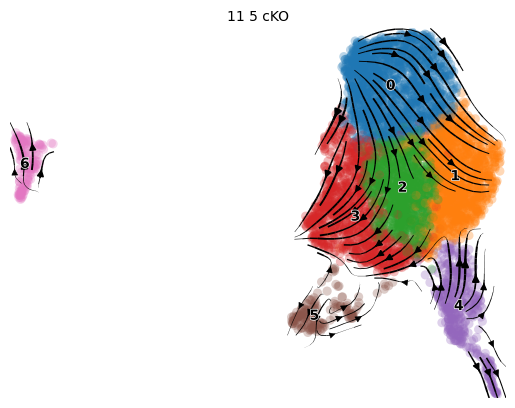

Plotting RNA velocity for 10_5_cKO with Leiden clusters...


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

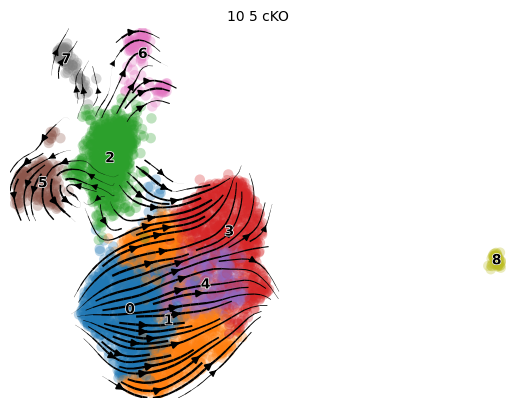

In [ ]:
# Rerun velocity plotting with leiden coloring
for key, adata in adata_dict.items():
    print(f"Plotting RNA velocity for {key} with Leiden clusters...")
    scv.pl.velocity_embedding_stream(adata, basis="umap", color="leiden", title=key)

In [ ]:
for key, adata in adata_dict.items():
    print(f"Available genes in {key}: {adata.var_names[:10]}")  # Show first 10 gene names


Available genes in 11_5_WT: Index(['Tmlhe', 'Snhg6', 'Tram1', 'Ube2w', 'Jph1', 'Fam135a', 'Uggt1',
       'Kansl3', 'Mitd1', 'Aff3'],
      dtype='object', name='Gene')
Available genes in 10_5_WT: Index(['Snhg6', 'Cops5', 'Tram1', 'Eya1', 'Prim2', 'Zfp451', 'Fam168b',
       'Uggt1', 'Tex30', 'Poglut2'],
      dtype='object', name='Gene')
Available genes in 11_5_cKO: Index(['Snhg6', 'Arfgef1', 'Ube2w', 'Jph1', 'Mcm3', 'Tram2', 'Kcnq5', 'Adgrb3',
       'Uggt1', 'Aff3'],
      dtype='object', name='Gene')
Available genes in 10_5_cKO: Index(['CAAA01118383.1', 'Vamp7', 'Cops5', 'Ncoa2', 'Eya1', 'Bag2', 'Txndc9',
       'Hecw2', 'Rftn2', 'Tmem237'],
      dtype='object', name='Gene')


Plotting velocity for 11_5_WT - Uggt1


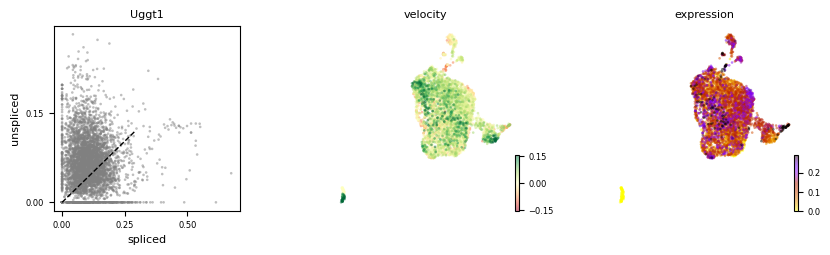

Plotting velocity for 10_5_WT - Uggt1


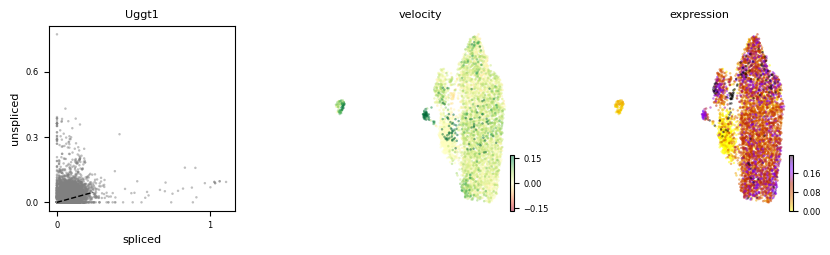

Plotting velocity for 11_5_cKO - Uggt1


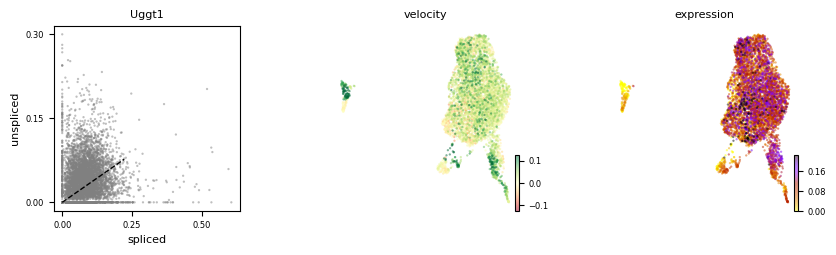

Skipping 10_5_cKO, Uggt1 not found.


In [ ]:
# Phase Portraits (to check splicing kinetics)
for key, adata in adata_dict.items():
    if "Uggt1" in adata.var_names:  # Ensure the gene exists in the dataset
        print(f"Plotting velocity for {key} - Uggt1")
        scv.pl.velocity(adata, var_names=["Uggt1"])  # Removed title argument
    else:
        print(f"Skipping {key}, Uggt1 not found.")


In [ ]:
# Combine Data for Comparative Analysis
adata_combined = adata_dict["11_5_WT"].concatenate(
    adata_dict["10_5_WT"],
    adata_dict["11_5_cKO"],
    adata_dict["10_5_cKO"],
    batch_key="condition",
    batch_categories=["11_5_WT", "10_5_WT", "11_5_cKO", "10_5_cKO"]
)

# Run UMAP
sc.pp.neighbors(adata_combined)
sc.tl.umap(adata_combined)

# Run velocity on combined data
scv.tl.velocity(adata_combined, mode="stochastic")
scv.tl.velocity_graph(adata_combined)

# Plot combined velocity
scv.pl.velocity_embedding_stream(adata_combined, basis="umap", legend_loc="right", title="Combined RNA Velocity")

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
# Differential velocity analysis
scv.tl.rank_velocity_genes(adata_combined, groupby="condition", min_corr=.3)
scv.pl.rank_velocity_genes(adata_combined, groupby="condition", n_genes=10)

NameError: name 'adata_combined' is not defined